### Ethan Blouin-"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

In [262]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from pandas.tools import plotting
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)

In [263]:
# accessing the data
df=pd.read_csv("pro1.csv")
df.head(1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000220CB278>,
      dtype=object)

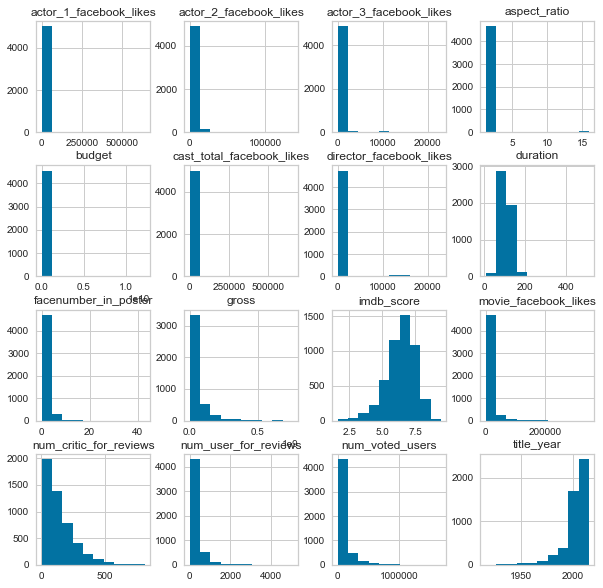

In [264]:
# histogram for all numerical columns
df.hist(figsize=(10,10))

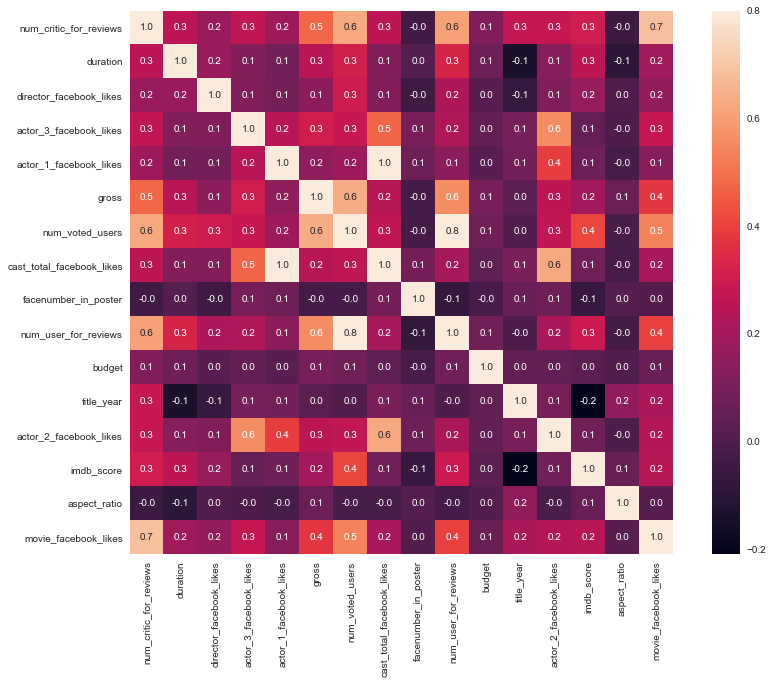

In [265]:
# heat map
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

In [266]:
# checking data types & null columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

- appears to have a lot of columns that will need to have their data  type changed
- several colmuns with missing data

In [267]:
# number of null columns 
df.isnull().sum()

color                        19 
director_name                104
num_critic_for_reviews       50 
duration                     15 
director_facebook_likes      104
actor_3_facebook_likes       23 
actor_2_name                 13 
actor_1_facebook_likes       7  
gross                        884
genres                       0  
actor_1_name                 7  
movie_title                  0  
num_voted_users              0  
cast_total_facebook_likes    0  
actor_3_name                 23 
facenumber_in_poster         13 
plot_keywords                153
movie_imdb_link              0  
num_user_for_reviews         21 
language                     12 
country                      5  
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes       13 
imdb_score                   0  
aspect_ratio                 329
movie_facebook_likes         0  
dtype: int64

In [268]:
# correlation to imdb_score
corr = pd.DataFrame(df.corr()['imdb_score'].drop('imdb_score'))
corr.sort_values(['imdb_score'], ascending = False)

,imdb_score
num_voted_users,0.410965
num_critic_for_reviews,0.305303
num_user_for_reviews,0.292475
duration,0.261662
movie_facebook_likes,0.247049
gross,0.198021
director_facebook_likes,0.170802
cast_total_facebook_likes,0.085787
actor_2_facebook_likes,0.083808
actor_1_facebook_likes,0.076099


In [269]:
# dropping all columns that can be dropped
df = df.drop(['director_name', 'num_critic_for_reviews', 'director_facebook_likes', 'actor_3_facebook_likes',\
             'actor_2_name', 'actor_1_facebook_likes', 'genres', 'gross', 'actor_1_name', 'movie_title', 'actor_3_name', \
              'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language',\
              'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'aspect_ratio'], axis=1)

#### all columns were dropped because there was too many missing values, low correlation number, or the column itself will not be used in the analysis 

In [270]:
# viewing null columns again
df.isnull().sum()

color                        19
duration                     15
num_voted_users              0 
cast_total_facebook_likes    0 
imdb_score                   0 
movie_facebook_likes         0 
dtype: int64

In [271]:
# finding averages for duration to replace null values with
print df['duration'].mean()

107.201073986


In [272]:
# filling color na's with color (assuming almost all with na's are color movies)
df = df.fillna({'color': 'Color'})
# filling duration na's with the averages from the rest of the data (using .0 because all of the other durations end in .0)
df = df.fillna({'duration' : '107.0'})

In [273]:
# dummy variables for the color column
df = pd.get_dummies(df, columns=["color"]).head()

In [274]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
duration                     5 non-null object
num_voted_users              5 non-null int64
cast_total_facebook_likes    5 non-null int64
imdb_score                   5 non-null float64
movie_facebook_likes         5 non-null int64
color_ Black and White       5 non-null uint8
color_Color                  5 non-null uint8
dtypes: float64(1), int64(3), object(1), uint8(2)
memory usage: 282.0+ bytes


In [275]:
# changing dummy variables to categorial data
df['b&w'] = df["color_ Black and White"].astype('category')
df['color'] = df["color_Color"].astype('category')
df = df.drop(['color_ Black and White', 'color_Color'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
duration                     5 non-null object
num_voted_users              5 non-null int64
cast_total_facebook_likes    5 non-null int64
imdb_score                   5 non-null float64
movie_facebook_likes         5 non-null int64
b&w                          5 non-null category
color                        5 non-null category
dtypes: category(2), float64(1), int64(3), object(1)
memory usage: 458.0+ bytes


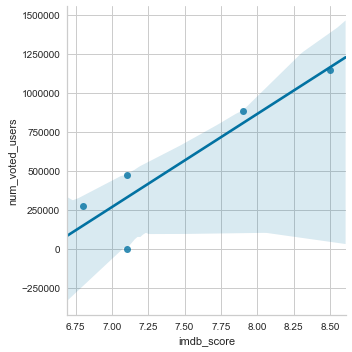

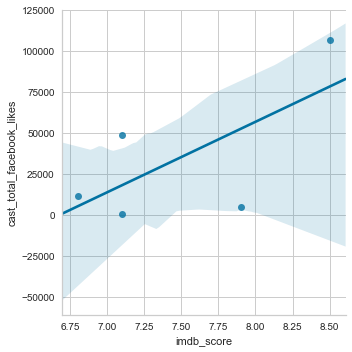

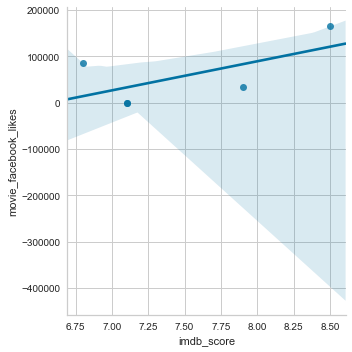

In [276]:
# relationships between imdb_score and remaining columns
sns.lmplot('imdb_score', 'num_voted_users', df)
sns.lmplot('imdb_score', 'cast_total_facebook_likes', df)
sns.lmplot('imdb_score', 'movie_facebook_likes', df)

### all columns remaining have a positive relationship

In [277]:
# making new column
df['fblikes_ratio'] = df['cast_total_facebook_likes'] / df['movie_facebook_likes']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
duration                     5 non-null object
num_voted_users              5 non-null int64
cast_total_facebook_likes    5 non-null int64
imdb_score                   5 non-null float64
movie_facebook_likes         5 non-null int64
b&w                          5 non-null category
color                        5 non-null category
fblikes_ratio                3 non-null float64
dtypes: category(2), float64(2), int64(3), object(1)
memory usage: 498.0+ bytes


#### I like 'fblikes_ratio' because it is possible, and a common practice for a movie to have a facebook page before it debuts. Also likely, the larger the number of facebook likes the cast has, a likelyhood that movie would have more facebook likes is high. With this new column hopefully we can get a truer measure of likes per actor, because some movies could have a hgiher number of likes, because they have more actors in it, not because it's more popular. 

In [278]:
# filling in inf figures in fblikes_ration
pd.set_option('use_inf_as_null', True)
df = df.fillna({'fblikes_ratio': 0})
df.head()


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



,duration,num_voted_users,cast_total_facebook_likes,imdb_score,movie_facebook_likes,b&w,color,fblikes_ratio
0,178,886204,4834,7.9,33000,0,1,0.146485
1,169,471220,48350,7.1,0,0,1,0.000000
2,148,275868,11700,6.8,85000,0,1,0.137647
3,164,1144337,106759,8.5,164000,0,1,0.650970
4,107.0,8,143,7.1,0,0,1,0.000000


In [279]:
df['num_voted_users'] = df['num_voted_users'].astype('int64')
df['cast_total_facebook_likes'] = df['cast_total_facebook_likes'].astype('int64')
df['imdb_score'] = df['imdb_score'].astype('int64')
df['movie_facebook_likes'] = df['movie_facebook_likes'].astype('int64')
df['b&w'] = df['b&w'].astype('int64')
df['color'] = df['color'].astype('int64')
df['fblikes_ratio'] = df['fblikes_ratio'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
duration                     5 non-null object
num_voted_users              5 non-null int64
cast_total_facebook_likes    5 non-null int64
imdb_score                   5 non-null int64
movie_facebook_likes         5 non-null int64
b&w                          5 non-null int64
color                        5 non-null int64
fblikes_ratio                5 non-null int64
dtypes: int64(7), object(1)
memory usage: 392.0+ bytes


# Regression

In [280]:
# regression for columns duration and fblikes_ratio
X = df[['duration', 'fblikes_ratio']]
y = df['imdb_score'] 

In [281]:
# model building and training, predicted values
model1 = lm.LinearRegression()
model1.fit(X, y)
model1_y = model1.predict(X)

In [282]:
# The coefficients
print 'Coefficients: ', model1.coef_
# y-intercept
print "y-intercept ", model1.intercept_

Coefficients:  [0.005091 0.      ]
y-intercept  6.220058546519027


- y = .005x+6.22


In [283]:
print "mean square error: ", mean_squared_error(y, model1_y)
print explained_variance_score(y, model1_y)

mean square error:  0.38370879470535824
0.040728013236604355


### seems to be an okay model, but not dpendable enough for business use

In [284]:
# lasso regression
y = df['imdb_score']
X = df.drop(['imdb_score'], axis=1)

In [285]:
# fit model
model1 =lm.Lasso(alpha=0.1)              
model1.fit(X, y)
model1_y = model1.predict(X)

In [286]:
print 'Coefficients: ', model1.coef_
print "y-intercept ", model1.intercept_

Coefficients:  [-2.57145105e-02  2.31613577e-06  1.08146789e-05 -8.11688126e-06
  0.00000000e+00  0.00000000e+00  0.00000000e+00]
y-intercept  9.739016151440373


In [287]:
a = zip(xcolumns, coef)
df3 = pd.DataFrame(a)
df3.sort_values(1,ascending=False)

,0,1
1,num_voted_users,0.000
2,cast_total_facebook_likes,0.000
4,b&w,0.000
5,color,0.000
6,fblikes_ratio,0.000
0,duration,-0.026
3,movie_facebook_likes,-0.000


In [288]:
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

mean square error:  5.463535960884048e-05
variance or r-squared:  0.9998634116009779


### better model

# Classification

In [289]:
# creating category column
df['category']= 1
df['category'][(df['imdb_score'] >= 4) & (df['imdb_score'] <= 6)] = 2
df['category'][(df['imdb_score'] > 6) & (df['imdb_score'] <= 8)] = 3
df['category'][df['imdb_score'] > 8] = 4

df.head(1)


C:\Users\Ethan\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ethan\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Ethan\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

,duration,num_voted_users,cast_total_facebook_likes,imdb_score,movie_facebook_likes,b&w,color,fblikes_ratio,category
0,178,886204,4834,7,33000,0,1,0,3


In [290]:
# calling variables
y = df['category']
X = df.drop(['category', 'imdb_score', 'duration'], axis=1)

In [291]:
# building and training model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [292]:
print metrics.accuracy_score(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, knn.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, knn.predict(X_test))

0.5
--------------------------------------------------------
[[0 1]
 [0 1]]
--------------------------------------------------------
             precision    recall  f1-score   support

          2       0.00      0.00      0.00         1
          3       0.50      1.00      0.67         1

avg / total       0.25      0.50      0.33         2

--------------------------------------------------------


C:\Users\Ethan\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ValueError: Data is not binary and pos_label is not specified

# Clustering

In [293]:
# building tqo clusters
k_means = KMeans(init='k-means++', n_clusters=2, random_state=0)

In [294]:
k_means.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [295]:
# cluster each movie belongs to
k_means.labels_

array([1, 0, 0, 1, 0])

In [296]:
# joining dataframes
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df2 = df.join(df1)

In [297]:
# profile of each cluster
df2.groupby('cluster').mean()

,num_voted_users,cast_total_facebook_likes,imdb_score,movie_facebook_likes,b&w,color,fblikes_ratio,category
cluster,,,,,,,,
0,249032.0,20064.333333,6.666667,28333.333333,0.0,1.0,0.0,2.666667
1,1015270.5,55796.500000,7.500000,98500.000000,0.0,1.0,0.0,3.000000


- As you can see, cluster two are movies that were probably less popular, while cluster one is movies that are more popular
- all movies in cluster 1 were in category 3

# Storytelling

- hard to predict movie success because alot of useful statistics don't come out until after the movie has been debuted
- the regression analysis with all remaining columns in it proved to be a good model
- the two clusters that were made show many differences 
- they were clustered by popularity, as cluster 1 has a higher score and category rating on average
- one attribute I would recommend for producers to pay attention to is the duration of the movie
- getting actors that have a big following as well is a major key, as facebook likes play an important role and the actors social media accounts could be used for advertising the movie
- imdb_score and gross didn't have a high correlation, so just because a movie scores high on imdb doesn't mean it made a lot of money
- actor 3's facebook likes has a higher correlation than actor 1's or actor 2's